In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = 24

In [3]:
df = pd.read_csv(r"C:\Users\admin\Desktop\supply_chain_data.csv")

In [4]:
df.shape

(100, 24)

In [5]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [6]:
df.drop('SKU',inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    object 
 6   Stock levels             100 non-null    int64  
 7   Lead times               100 non-null    int64  
 8   Order quantities         100 non-null    int64  
 9   Shipping times           100 non-null    int64  
 10  Shipping carriers        100 non-null    object 
 11  Shipping costs           100 non-null    float64
 12  Supplier name            100 non-null    object 
 13  Location                 100 non-null    object 
 14  Lead time                10

In [8]:
df.isnull().sum()

Product type               0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
c1=0
c2=0
cat_cols=[]
num_cols=[]
for i in df.columns:
    if df[i].dtype == 'object':
        c1+=1
        cat_cols.append(i)
    else:
        num_cols.append(i)
        c2+=1
print("Categorical columns: ",c1)
print("Numerical columns: ",c2)

Categorical columns:  8
Numerical columns:  15


### Let's check the categorical columns

In [11]:
for i in cat_cols:
    print(df[i].value_counts())
    print()

skincare     40
haircare     34
cosmetics    26
Name: Product type, dtype: int64

Unknown       31
Female        25
Non-binary    23
Male          21
Name: Customer demographics, dtype: int64

Carrier B    43
Carrier C    29
Carrier A    28
Name: Shipping carriers, dtype: int64

Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: Supplier name, dtype: int64

Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: Location, dtype: int64

Pending    41
Fail       36
Pass       23
Name: Inspection results, dtype: int64

Road    29
Rail    28
Air     26
Sea     17
Name: Transportation modes, dtype: int64

Route A    43
Route B    37
Route C    20
Name: Routes, dtype: int64



### All the categorical columns have balanced values

In [12]:
df.corr(numeric_only=True)['Price']

Price                      1.000000
Availability               0.019083
Number of products sold    0.005739
Revenue generated          0.038424
Stock levels               0.078261
Lead times                 0.044855
Order quantities           0.095819
Shipping times             0.071942
Shipping costs             0.058543
Lead time                  0.152185
Production volumes        -0.124575
Manufacturing lead time   -0.301313
Manufacturing costs       -0.184123
Defect rates              -0.147247
Costs                      0.088501
Name: Price, dtype: float64

In [13]:
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_26240\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Price,1.000000,0.019083,0.005739,0.038424,0.078261,0.044855,0.095819,0.071942,0.058543,0.152185,-0.124575,-0.301313,-0.184123,-0.147247,0.088501
Availability,0.019083,1.000000,0.087496,-0.075170,-0.025900,0.170439,0.143769,-0.051377,-0.044179,-0.156669,0.050134,0.065333,0.134652,0.040626,-0.027315
Number of products sold,0.005739,0.087496,1.000000,-0.001641,0.022189,-0.046419,0.015992,0.087315,0.044285,0.041230,0.187945,-0.048939,0.034284,-0.082726,-0.036951
Revenue generated,0.038424,-0.075170,-0.001641,1.000000,-0.158480,-0.057296,0.029422,-0.109211,-0.072892,-0.014178,-0.037441,0.014073,-0.214025,-0.125335,0.027252
Stock levels,0.078261,-0.025900,0.022189,-0.158480,1.000000,0.072571,-0.111455,-0.094883,0.072907,0.067880,0.043763,-0.050592,0.033243,-0.149478,-0.012088
Lead times,0.044855,0.170439,-0.046419,-0.057296,0.072571,1.000000,0.105459,-0.045156,-0.120746,-0.002818,-0.145324,0.003364,-0.024441,0.015681,0.243686
Order quantities,0.095819,0.143769,0.015992,0.029422,-0.111455,0.105459,1.000000,-0.002561,0.004261,-0.086189,-0.086567,0.112347,-0.026784,0.018986,0.167306
Shipping times,0.071942,-0.051377,0.087315,-0.109211,-0.094883,-0.045156,-0.002561,1.000000,0.045108,-0.022214,-0.060470,-0.016953,0.029132,-0.036673,-0.045541
Shipping costs,0.058543,-0.044179,0.044285,-0.072892,0.072907,-0.120746,0.004261,0.045108,1.000000,0.029680,-0.097979,-0.005653,0.005984,0.083139,0.051671
Lead time,0.152185,-0.156669,0.041230,-0.014178,0.067880,-0.002818,-0.086189,-0.022214,0.029680,1.000000,0.212676,0.026756,-0.121999,0.297099,0.045219


In [14]:
demo=df.copy()

In [15]:
demo['Total costs'] = demo['Shipping costs'] + demo['Costs'] + demo['Manufacturing costs']
demo['Total_lead_time'] = demo['Lead times'] + demo['Lead time'] + demo['Shipping times'] + demo['Manufacturing lead time']
demo.drop(columns=['Shipping costs','Costs','Manufacturing costs'],axis=1,inplace=True)
demo.drop(columns=['Lead times','Lead time','Shipping times','Manufacturing lead time'],inplace=True, axis=1)

In [16]:
c1=0
c2=0
cat_cols=[]
num_cols=[]
for i in df.columns:
    if df[i].dtype == 'object':
        c1+=1
        cat_cols.append(i)
    else:
        num_cols.append(i)
        c2+=1
print("Categorical columns: ",c1)
print("Numerical columns: ",c2)

Categorical columns:  8
Numerical columns:  15


# EDA

## Which product type has highest revenue generated?

<Axes: xlabel='Product type'>

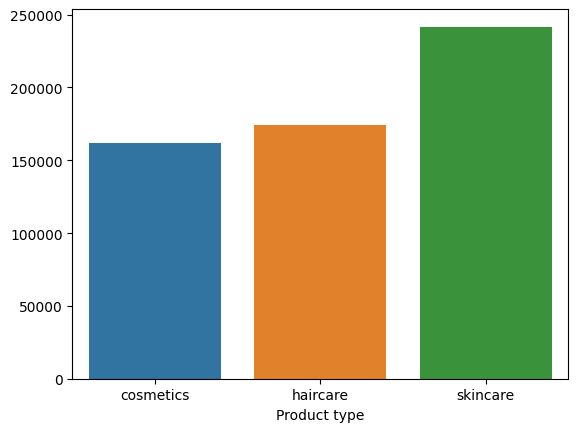

In [17]:
x=demo.groupby('Product type').sum(numeric_only=True)['Revenue generated'].index
y=demo.groupby('Product type').sum(numeric_only=True)['Revenue generated'].values
sns.barplot(x=x,y=y)

In [18]:
demo.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Order quantities,Production volumes,Defect rates,Total costs,Total_lead_time
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,49.220000,567.840000,2.277158,582.060624,53.560000
std,31.168193,30.743317,303.780074,2732.841744,31.369372,26.784429,263.046861,1.461366,259.673268,15.574078
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,104.000000,0.018608,139.334929,19.000000
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,26.000000,352.000000,1.009650,354.515523,43.000000
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,52.000000,568.500000,2.141863,571.234737,53.000000
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,71.250000,797.000000,3.563995,801.367689,63.000000
max,99.171329,100.000000,996.000000,9866.465458,100.000000,96.000000,985.000000,4.939255,1083.428867,90.000000


In [19]:
num_cols=[]
for i in demo.columns:
    if demo[i].dtype!='object':
        num_cols.append(i)

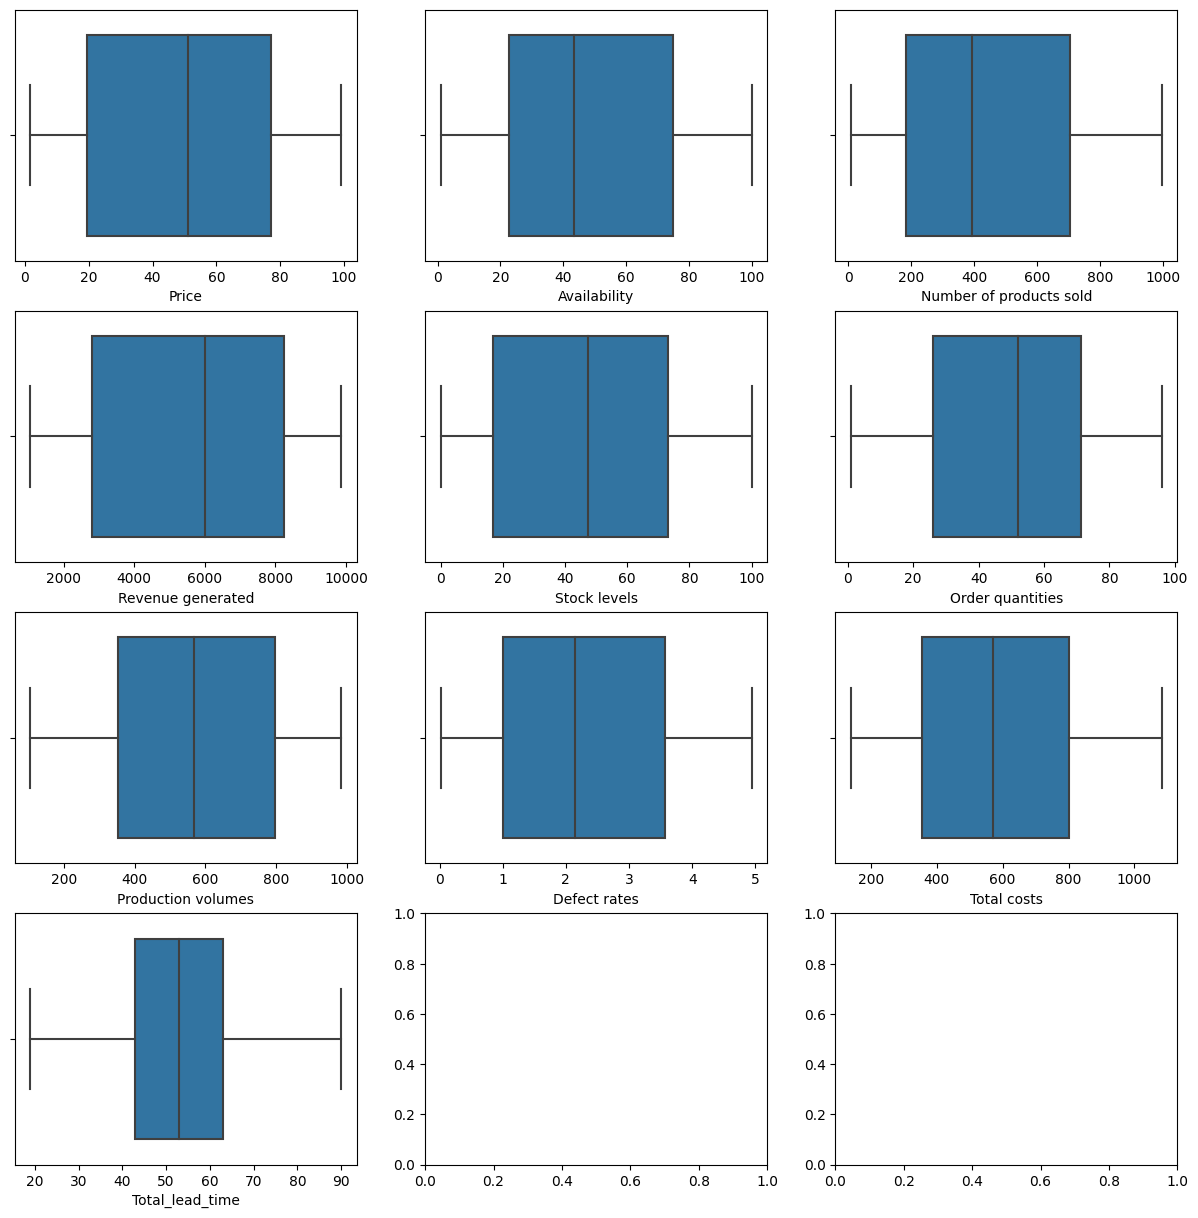

In [20]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x=demo[column], ax=axes[i])

plt.show()

## No outliers found

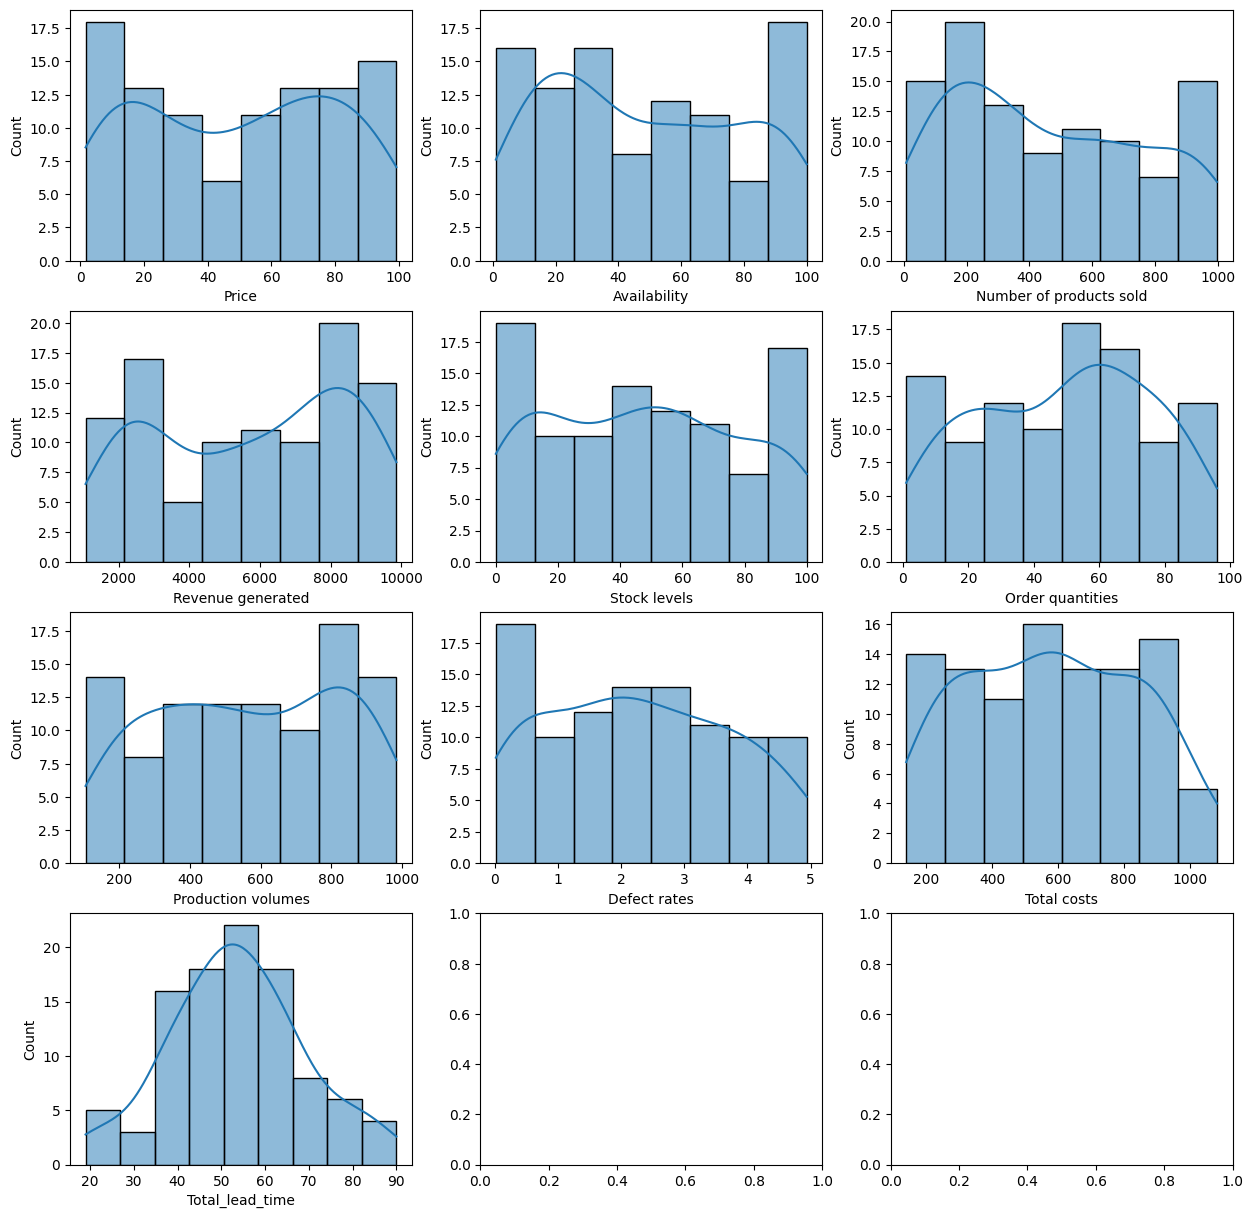

In [21]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.histplot(x=demo[column], kde=True, ax=axes[i])

plt.show()

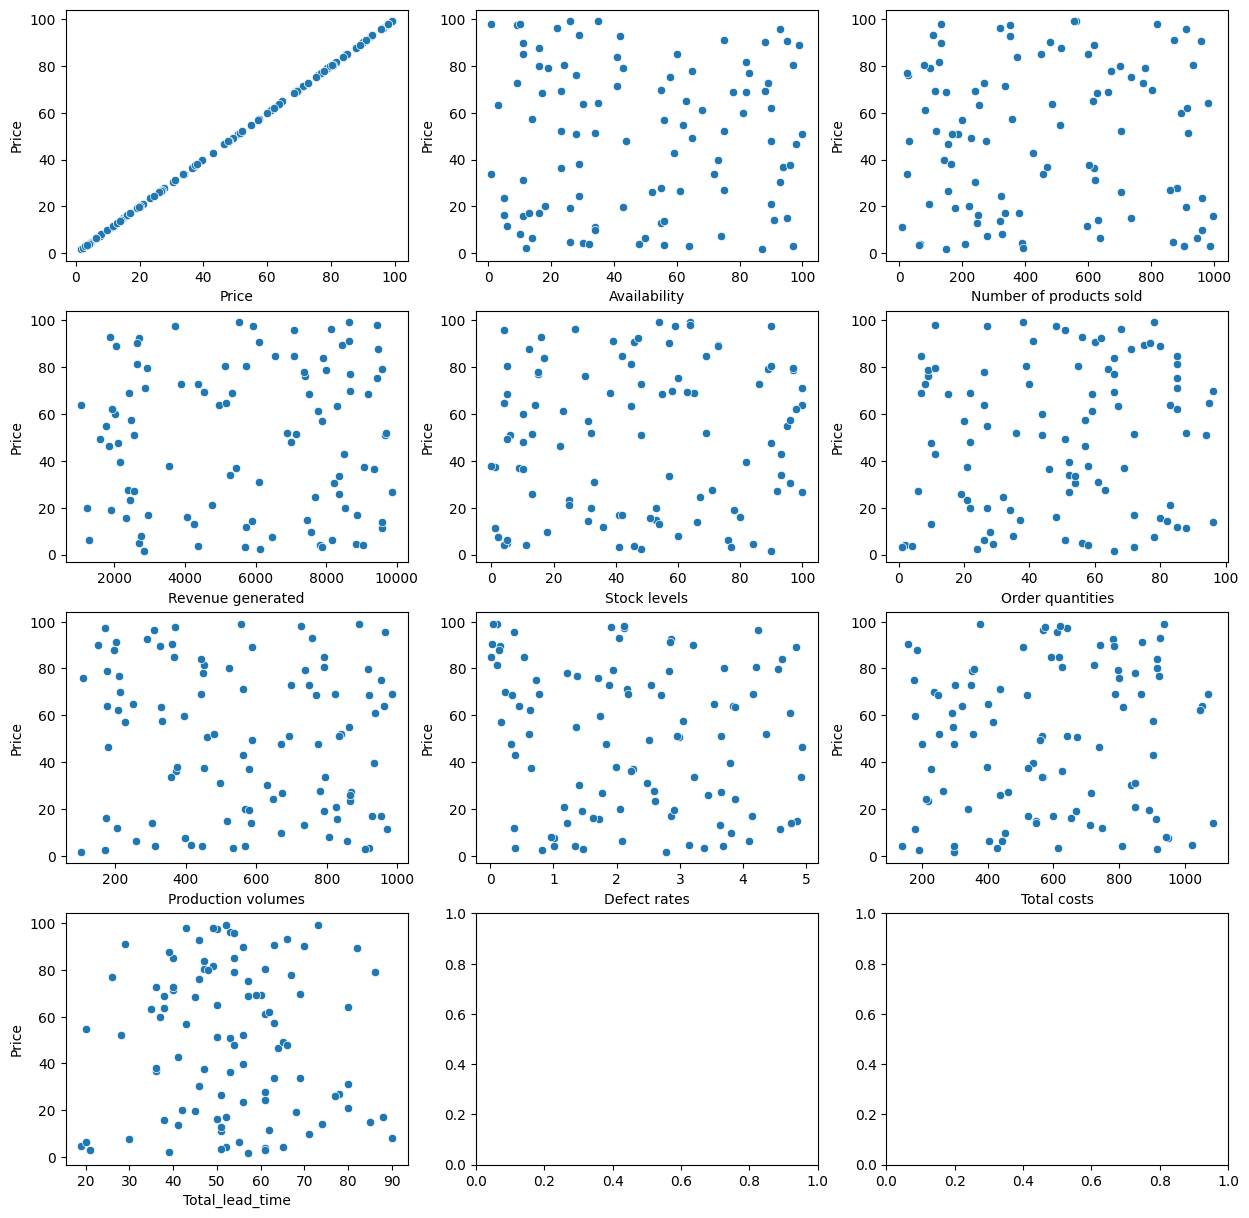

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.scatterplot(x=demo[column],y=demo['Price'], ax=axes[i])

plt.show()

## After plotting the scatterplot we got that there is no any specific correlation between the Price and other columns

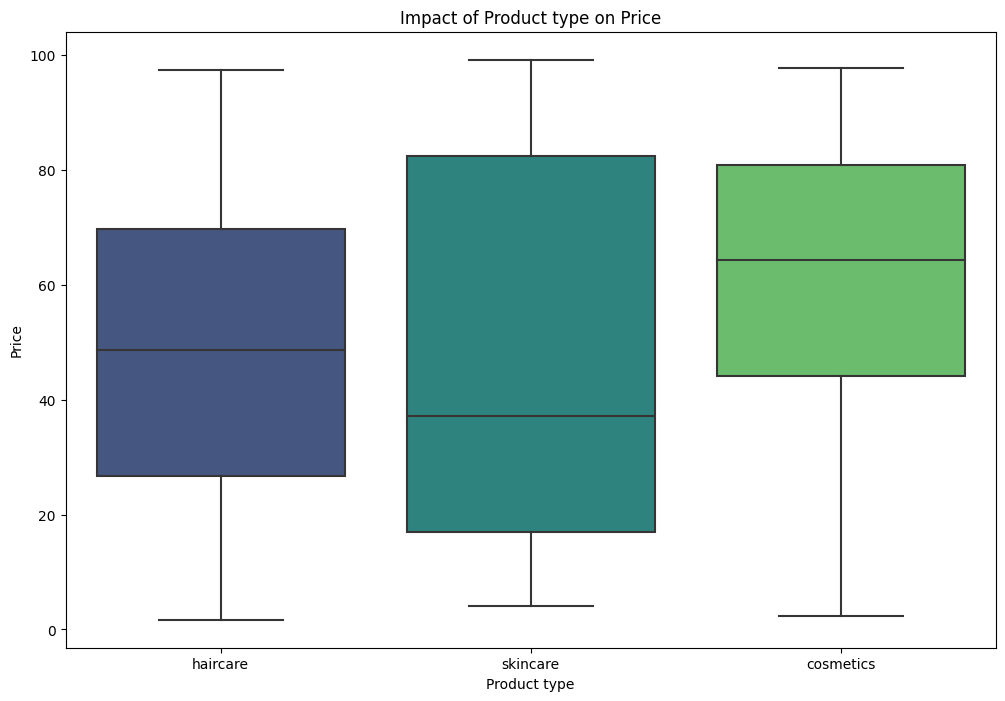

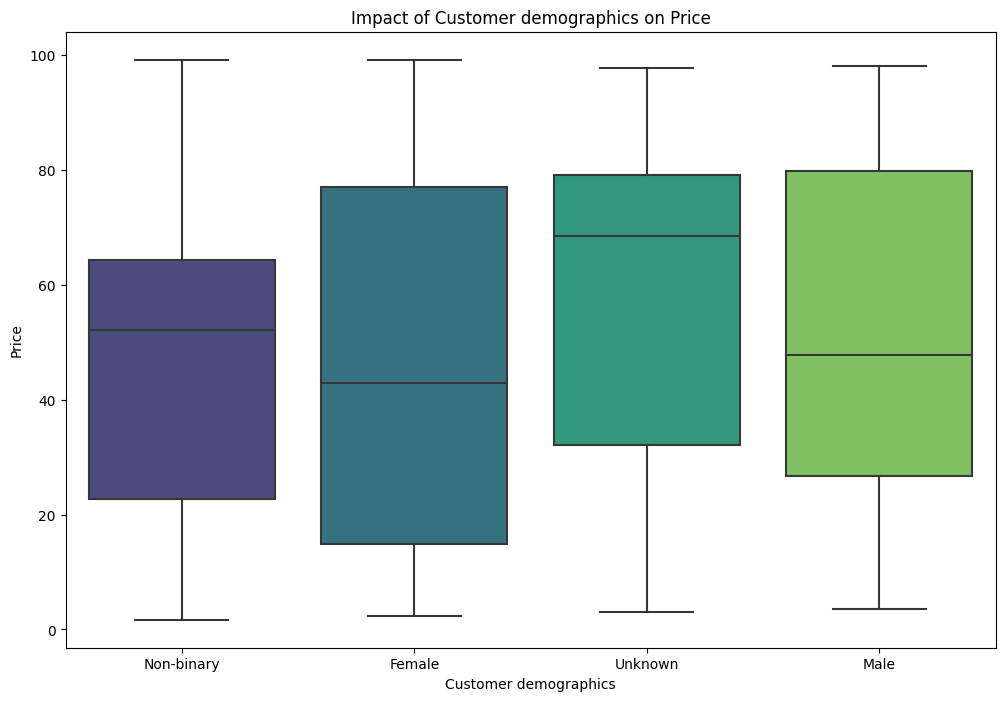

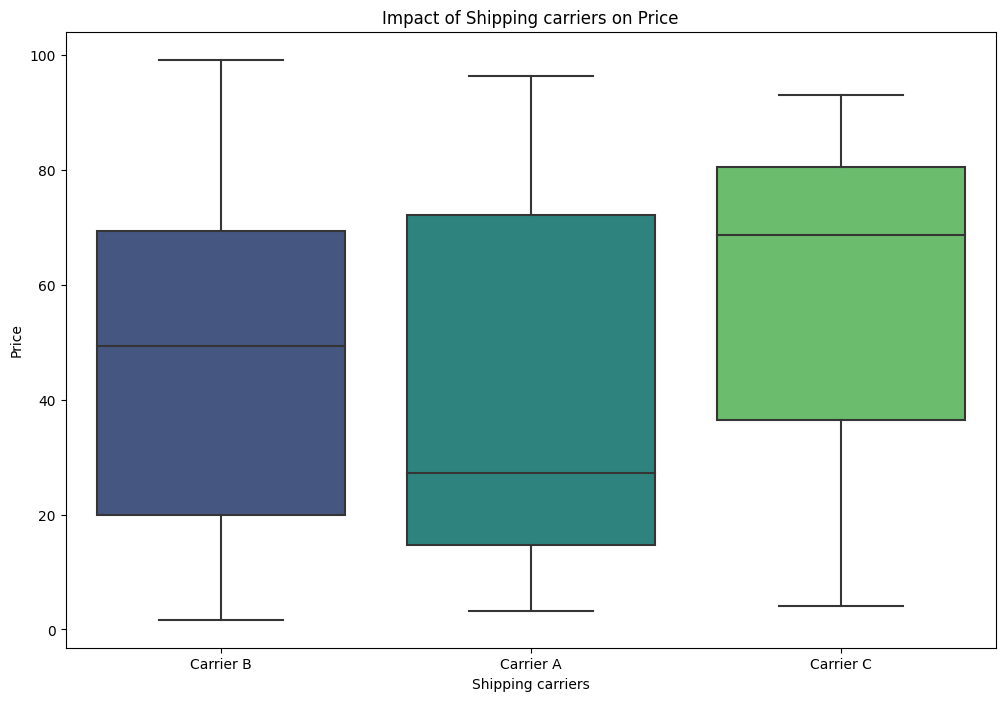

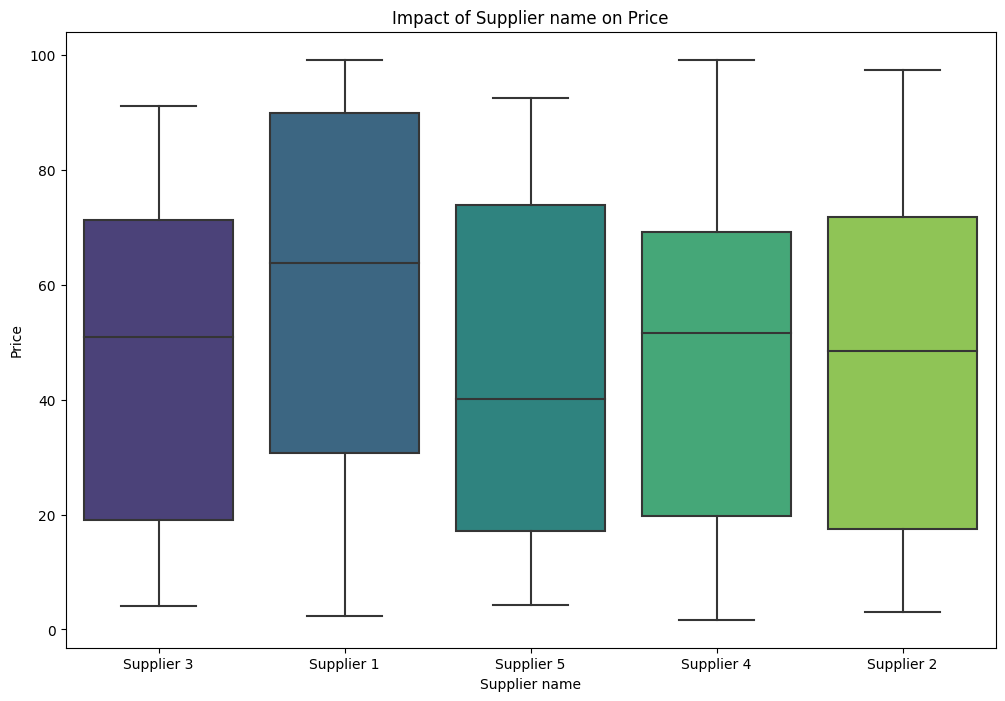

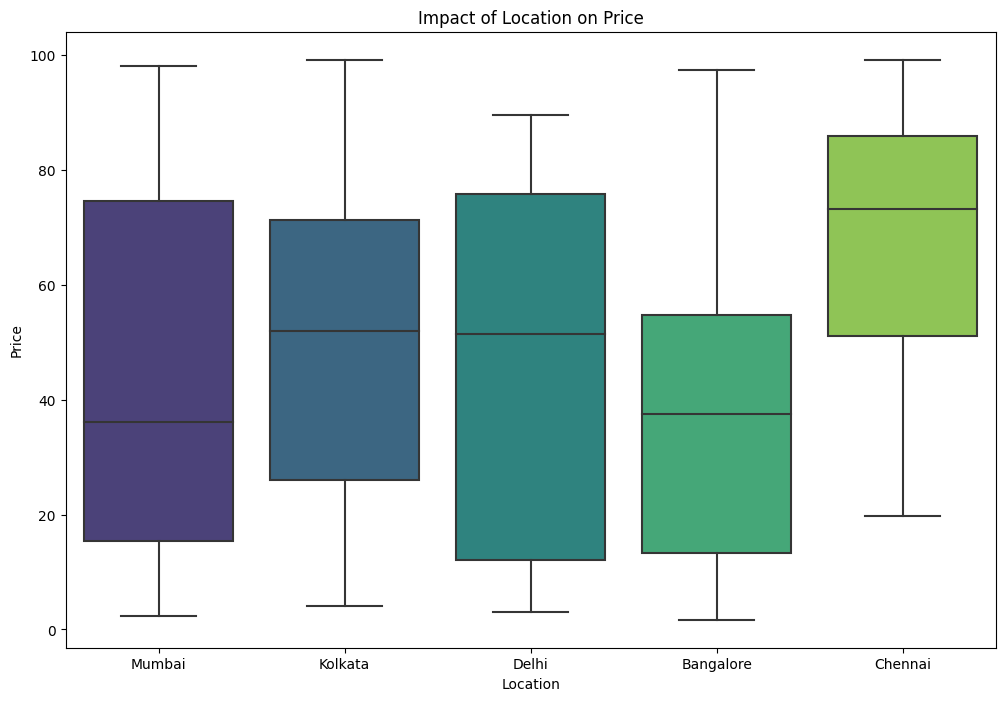

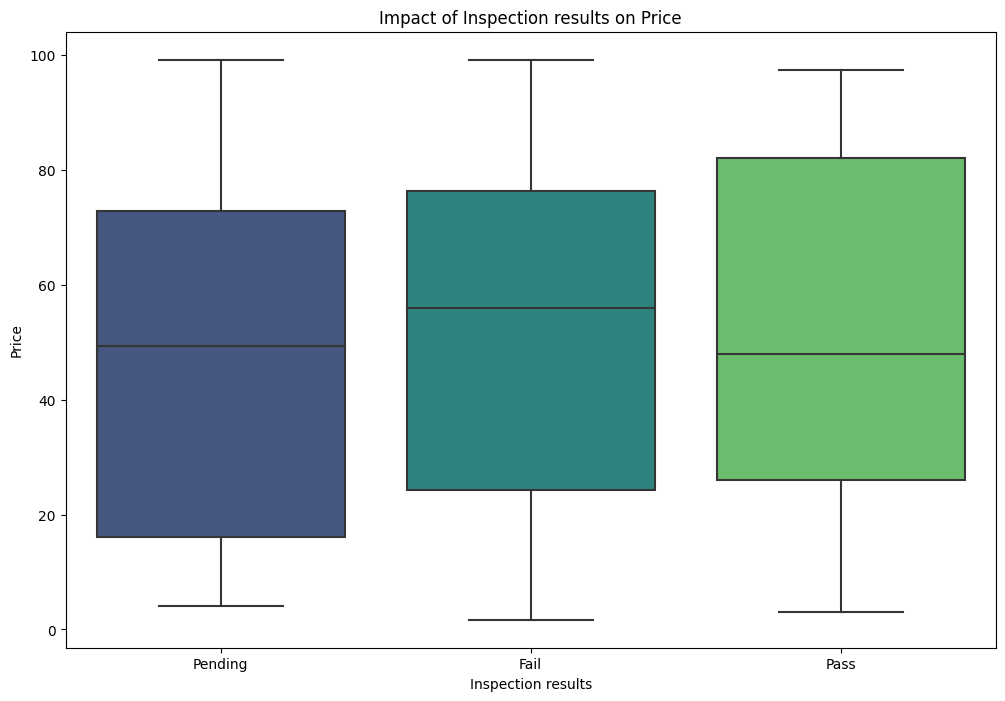

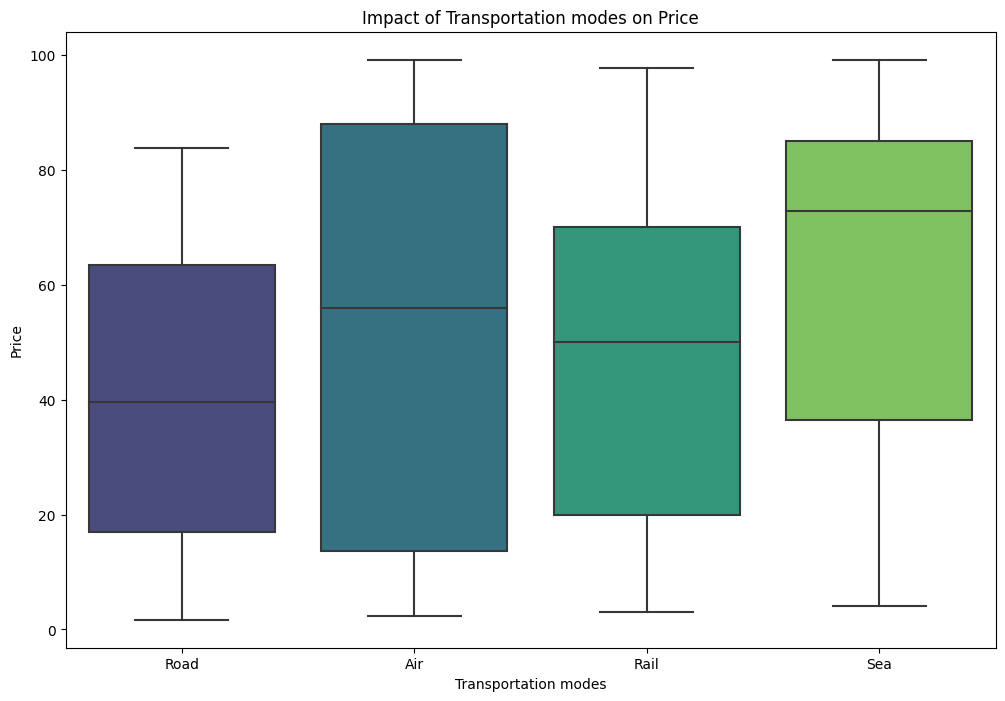

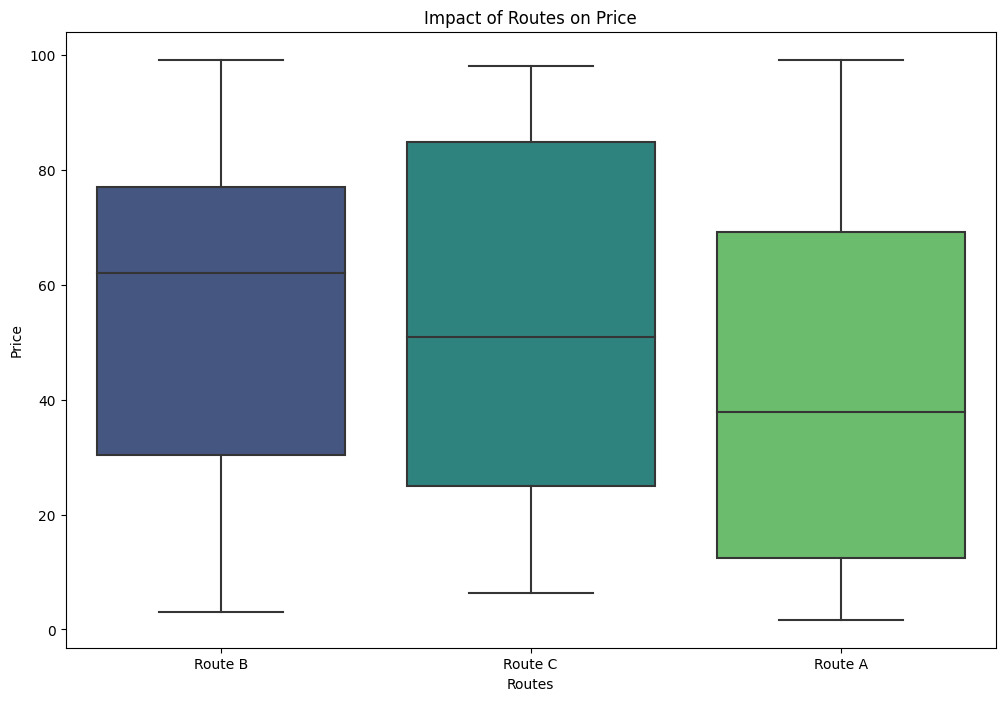

In [23]:
for cat_var in cat_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=cat_var, y='Price', data=demo, palette='viridis')
    plt.title(f'Impact of {cat_var} on Price')
    plt.show()

## There is no any specific effect on Price with the corresponding categroical columns

In [24]:
cat_cols

['Product type',
 'Customer demographics',
 'Shipping carriers',
 'Supplier name',
 'Location',
 'Inspection results',
 'Transportation modes',
 'Routes']

In [25]:
cat_cols.remove('Supplier name')
cat_cols.remove('Customer demographics')
cat_cols.remove('Routes')
cat_cols.remove('Location')
demo.drop(columns=['Supplier name','Customer demographics','Routes','Location'],axis=1,inplace=True)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [27]:
X_train,X_test,y_train,y_test = train_test_split(demo.drop('Price',axis=1),demo['Price'],test_size=0.2,random_state=42)

In [28]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first')

In [29]:
encoder.fit(X_train[cat_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [30]:
encoded_cols =encoder.get_feature_names_out()

In [31]:
X_train[encoded_cols] = encoder.transform(X_train[cat_cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_cols])

In [32]:
X_train.drop(columns=cat_cols,axis=1,inplace=True)
X_test.drop(columns=cat_cols,axis=1,inplace=True)

In [33]:
X_train.head()

,Availability,Number of products sold,Revenue generated,Stock levels,Order quantities,Production volumes,Defect rates,Total costs,Total_lead_time,Product type_haircare,Product type_skincare,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Inspection results_Pass,Inspection results_Pending,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea
55,16,701,2925.675170,97,11,918,4.548920,358.350838,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88,58,737,9444.742033,60,85,953,0.722204,175.902420,57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26,9,353,3716.493326,59,48,171,2.119320,640.346695,50,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
42,98,155,1839.609426,22,57,179,4.939255,739.606189,64,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
69,62,511,1752.381087,95,27,862,1.362388,294.996259,20,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
scaler = MinMaxScaler()

In [35]:
num_cols.remove('Price')

In [36]:
scaler.fit(X_train[num_cols])

MinMaxScaler()

In [37]:
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
np.sqrt(mse(y_test,y_predict)), r2_score(y_test,y_predict)

(35.59352585815122, -0.9638545817747297)

Linear Regression:
MSE 1266.8990830148794
RMSE: 35.59352585815122
R-squared: -0.9638545817747297

Random Forest Regression:
MSE 815.6507136125807
RMSE: 28.559599325140763
R-squared: -0.2643622625757962

Decision Tree Regression:
MSE 2546.6437664740374
RMSE: 50.46428208618485
R-squared: -2.9476214767134334

Support Vector Regression:
MSE 687.4766196380564
RMSE: 26.219775354454438
R-squared: -0.06567612798828071

K-Nearest Neighbors Regression:
MSE 1118.9369973454307
RMSE: 33.45051565141307
R-squared: -0.7344945453151568

Gradient Boosting Regression:
RMSE: 35.89299208669635
R-squared: -0.9970393891489353

Lasso Regression:
MSE 820.7847056024699
RMSE: 28.649340404317687
R-squared: -0.27232060261038304

Ridge Regression:
MSE 1138.6023041192477
RMSE: 33.74318159449769
R-squared: -0.7649782699681589



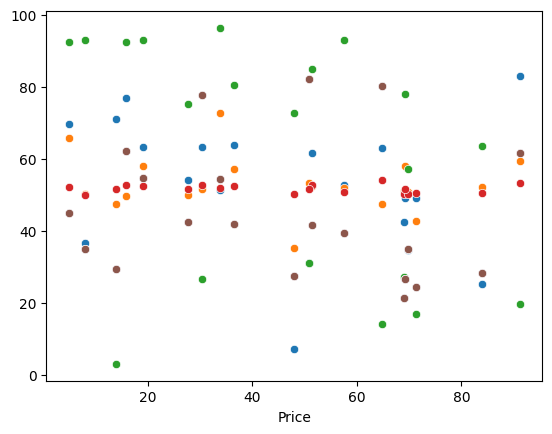

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_predict_lr)
r2_lr = r2_score(y_test, y_predict_lr)
print("Linear Regression:")
print("MSE",mse_lr)
print("RMSE:", np.sqrt(mse_lr))
print("R-squared:", r2_lr)
sns.scatterplot(x=y_test,y=y_predict_lr)
print()

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_predict_rf)
r2_rf = r2_score(y_test, y_predict_rf)
print("Random Forest Regression:")
print("MSE",mse_rf)
print("RMSE:", np.sqrt(mse_rf))
print("R-squared:", r2_rf)
sns.scatterplot(x=y_test,y=y_predict_rf)

print()

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_predict_dt)
r2_dt = r2_score(y_test, y_predict_dt)
print("Decision Tree Regression:")
print("MSE",mse_dt)
print("RMSE:", np.sqrt(mse_dt))
print("R-squared:", r2_dt)
sns.scatterplot(x=y_test,y=y_predict_dt)

print()

# Support Vector Regression (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_predict_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_predict_svr)
r2_svr = r2_score(y_test, y_predict_svr)
print("Support Vector Regression:")
print("MSE",mse_svr)
print("RMSE:", np.sqrt(mse_svr))
print("R-squared:", r2_svr)
sns.scatterplot(x=y_test,y=y_predict_svr)

print()

# K-Nearest Neighbors Regression (KNN)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_predict_knn)
r2_knn = r2_score(y_test, y_predict_knn)
print("K-Nearest Neighbors Regression:")
print("MSE",mse_knn)
print("RMSE:", np.sqrt(mse_knn))
print("R-squared:", r2_knn)
sns.scatterplot(x=y_test,y=y_predict_knn)

print()

# Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_predict_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_predict_gb)
r2_gb = r2_score(y_test, y_predict_gb)
print("Gradient Boosting Regression:")
print("RMSE:", np.sqrt(mse_gb))
print("R-squared:", r2_gb)
sns.scatterplot(x=y_test,y=y_predict_knn)

print()

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_predict_lasso)
r2_lasso = r2_score(y_test, y_predict_lasso)
print("Lasso Regression:")
print("MSE", mse_lasso)
print("RMSE:", np.sqrt(mse_lasso))
print("R-squared:", r2_lasso)
print()

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_predict_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_predict_ridge)
r2_ridge = r2_score(y_test, y_predict_ridge)
print("Ridge Regression:")
print("MSE", mse_ridge)
print("RMSE:", np.sqrt(mse_ridge))
print("R-squared:", r2_ridge)
print()


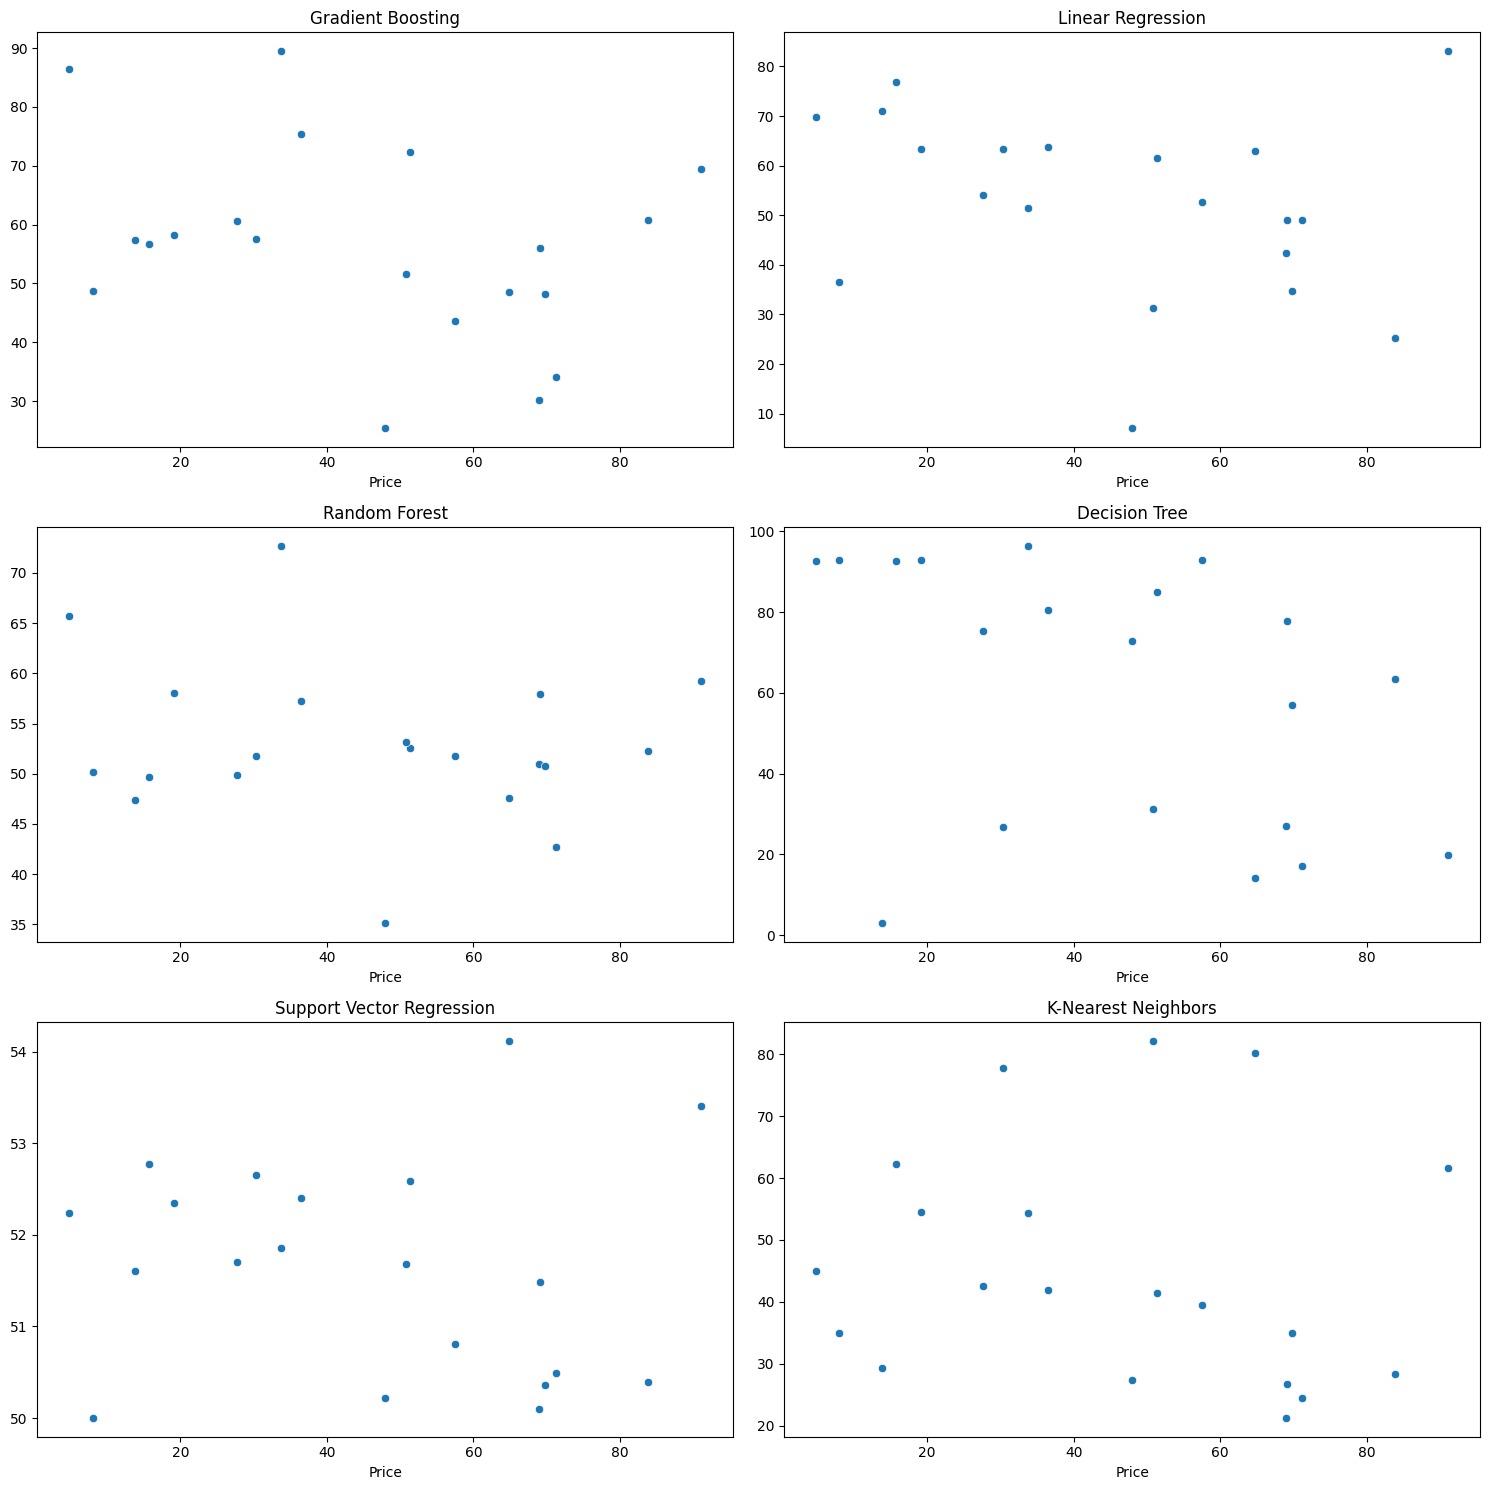

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot on each subplot
sns.scatterplot(x=y_test, y=y_predict_lr, ax=axes[0, 1])
axes[0, 1].set_title('Linear Regression')

sns.scatterplot(x=y_test, y=y_predict_rf, ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')

sns.scatterplot(x=y_test, y=y_predict_dt, ax=axes[1, 1])
axes[1, 1].set_title('Decision Tree')

sns.scatterplot(x=y_test, y=y_predict_svr, ax=axes[2, 0])
axes[2, 0].set_title('Support Vector Regression')

sns.scatterplot(x=y_test, y=y_predict_knn, ax=axes[2, 1])
axes[2, 1].set_title('K-Nearest Neighbors')

sns.scatterplot(x=y_test, y=y_predict_gb, ax=axes[0, 0])
axes[0, 0].set_title('Gradient Boosting')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X_train, y_train defined

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_train)
mse_lr = mean_squared_error(y_train, y_predict_lr)
r2_lr = r2_score(y_train, y_predict_lr)
print("Linear Regression:")
print("MSE", mse_lr)
print("RMSE:", np.sqrt(mse_lr))
print("R-squared:", r2_lr)
plt.show()
print()

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_train)
mse_rf = mean_squared_error(y_train, y_predict_rf)
r2_rf = r2_score(y_train, y_predict_rf)
print("Random Forest Regression:")
print("MSE", mse_rf)
print("RMSE:", np.sqrt(mse_rf))
print("R-squared:", r2_rf)
plt.show()
print()

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_train)
mse_dt = mean_squared_error(y_train, y_predict_dt)
r2_dt = r2_score(y_train, y_predict_dt)
print("Decision Tree Regression:")
print("MSE", mse_dt)
print("RMSE:", np.sqrt(mse_dt))
print("R-squared:", r2_dt)
plt.show()
print()

# Support Vector Regression (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_predict_svr = svr.predict(X_train)
mse_svr = mean_squared_error(y_train, y_predict_svr)
r2_svr = r2_score(y_train, y_predict_svr)
print("Support Vector Regression:")
print("MSE", mse_svr)
print("RMSE:", np.sqrt(mse_svr))
print("R-squared:", r2_svr)
plt.show()
print()

# K-Nearest Neighbors Regression (KNN)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_train)
mse_knn = mean_squared_error(y_train, y_predict_knn)
r2_knn = r2_score(y_train, y_predict_knn)
print("K-Nearest Neighbors Regression:")
print("MSE", mse_knn)
print("RMSE:", np.sqrt(mse_knn))
print("R-squared:", r2_knn)
plt.show()
print()

# Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_predict_gb = gb.predict(X_train)
mse_gb = mean_squared_error(y_train, y_predict_gb)
r2_gb = r2_score(y_train, y_predict_gb)
print("Gradient Boosting Regression:")
print("MSE",mse_gb)
print("RMSE:", np.sqrt(mse_gb))
print("R-squared:", r2_gb)
plt.show()
print()

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict_lasso = lasso.predict(X_train)
mse_lasso = mean_squared_error(y_train, y_predict_lasso)
r2_lasso = r2_score(y_train, y_predict_lasso)
print("Lasso Regression:")
print("MSE", mse_lasso)
print("RMSE:", np.sqrt(mse_lasso))
print("R-squared:", r2_lasso)
print()

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_predict_ridge = ridge.predict(X_train)
mse_ridge = mean_squared_error(y_train, y_predict_ridge)
r2_ridge = r2_score(y_train, y_predict_ridge)
print("Ridge Regression:")
print("MSE", mse_ridge)
print("RMSE:", np.sqrt(mse_ridge))
print("R-squared:", r2_ridge)
print()


Linear Regression:
MSE 808.2184964553966
RMSE: 28.429183886552153
R-squared: 0.2204145945177559

Random Forest Regression:
MSE 165.55923768623202
RMSE: 12.8669824623426
R-squared: 0.8403060979066874

Decision Tree Regression:
MSE 0.0
RMSE: 0.0
R-squared: 1.0

Support Vector Regression:
MSE 985.0680416622652
RMSE: 31.38579362804556
R-squared: 0.04983037129829171

K-Nearest Neighbors Regression:
MSE 809.3318814418838
RMSE: 28.44875887348838
R-squared: 0.21934065388170865

Gradient Boosting Regression:
MSE 27.693493645078444
RMSE: 5.262460797486138
R-squared: 0.973287615209002

Lasso Regression:
MSE 891.8677725068768
RMSE: 29.86415531212756
R-squared: 0.13972879596836796

Ridge Regression:
MSE 811.4294182605075
RMSE: 28.48560019133365
R-squared: 0.21731742736755155



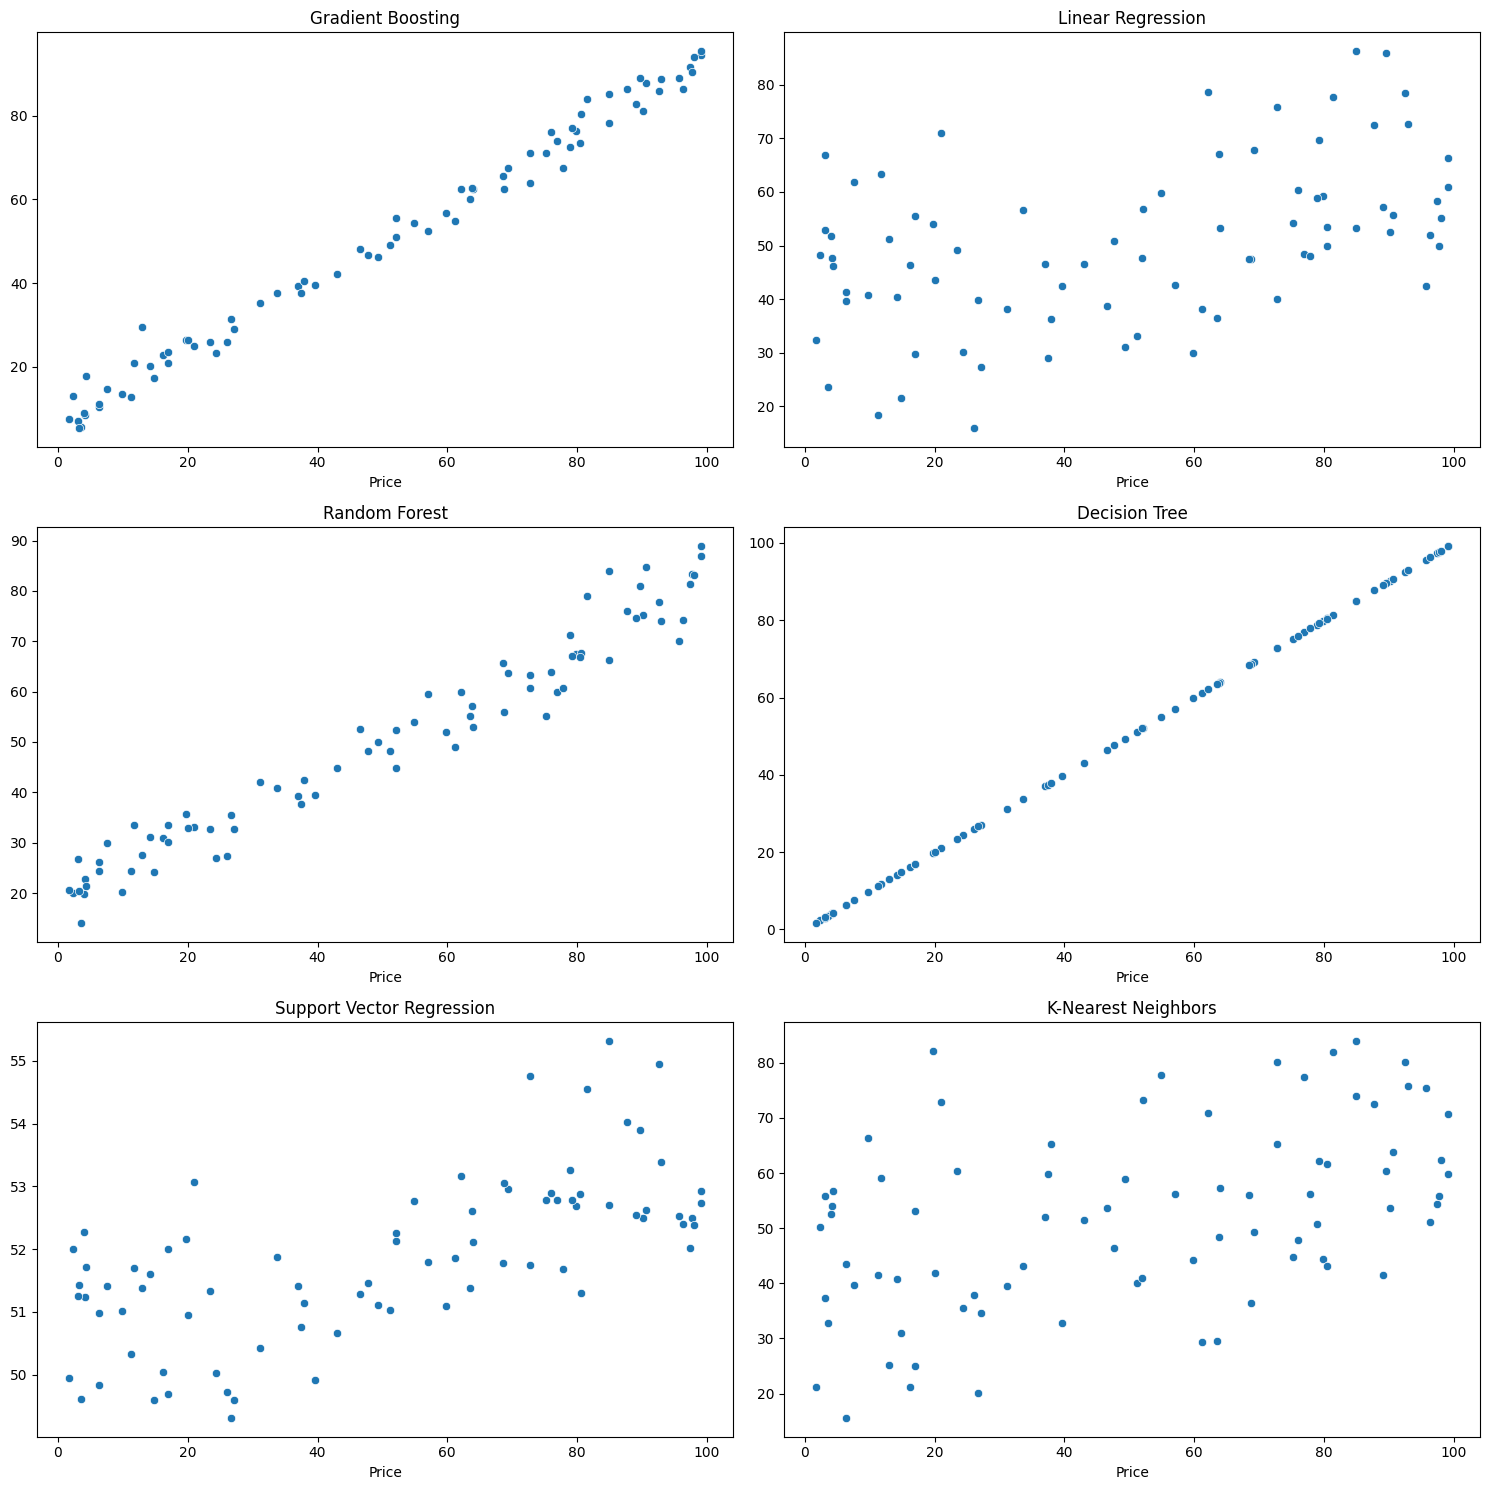

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot on each subplot
sns.scatterplot(x=y_train, y=y_predict_lr, ax=axes[0, 1])
axes[0, 1].set_title('Linear Regression')

sns.scatterplot(x=y_train, y=y_predict_rf, ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')

sns.scatterplot(x=y_train, y=y_predict_dt, ax=axes[1, 1])
axes[1, 1].set_title('Decision Tree')

sns.scatterplot(x=y_train, y=y_predict_svr, ax=axes[2, 0])
axes[2, 0].set_title('Support Vector Regression')

sns.scatterplot(x=y_train, y=y_predict_knn, ax=axes[2, 1])
axes[2, 1].set_title('K-Nearest Neighbors')

sns.scatterplot(x=y_train, y=y_predict_gb, ax=axes[0, 0])
axes[0, 0].set_title('Gradient Boosting')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()